<h1>Foundations of Artificial Intelligence</h1>
<h2>Practical Lab</h2>

<link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css">

<div class="alert alert-warning" role="alert">
  <h5 class="alert-heading">Install Prerequisites</h5>
  <p>Run the below codeblocks to install required Python libraries used in this notebook.</p>
  <p>The `pygraphviz` and prereqsuisite `graphviz-dev` are used for visualising the DFA/NFAs. However, the rest of the exercises should be possible without these</p>
</div>

In [6]:
!sudo apt-get install -y graphviz-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'libgraphviz-dev' instead of 'graphviz-dev'
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 49 not upgraded.
Need to get 2,434 kB of archives.
After this operation, 7,681 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2.1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2.1 [2,038 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgail18 

In [7]:
%pip install pygraphviz coloraide automata-lib --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.0/106.0 kB 5.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.0/238.0 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 7.8 MB/s eta 0:00:00


<link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css">

<div class="alert alert-info" role="alert">
  <h5 class="alert-heading">Import Libraries</h5>
  <p>Run the below codeblock to import the Python libraries used in this notebook, as well as some functions used to check your solutions</p>
</div>

In [8]:
# Import DFA and NFA objects from the automata library
from automata.fa.dfa import DFA
from automata.fa.nfa import NFA

# Import hashlib for checking solutions
from hashlib import md5
from networkx import weisfeiler_lehman_graph_hash as wlhash, union_all
check_soln = lambda soln, hash : md5(str(soln).encode("utf-8")).hexdigest() == hash
DFA_hash = lambda A: wlhash(union_all([G:=A._get_digraph(),((X:=G.copy()).remove_node(A.initial_state) or X),((X:=G.copy()).remove_nodes_from(A.final_states) or X)],rename=('G1#', 'G2#','G3#')))
check_DFA_soln = lambda A, hash: DFA_hash(A.minify()) == hash

# Feel free to import any additional libraries that you will find useful
import itertools

## Task 1

#### Part 1.1
Sketch (on paper) the DFA described below then run the the code block to check your answer.

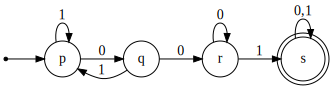

In [9]:
## You do not need to edit this code block; just run it
A = DFA(input_symbols={'0','1'},
		states = {'p','q','r','s'},
		initial_state='p',
		final_states = {'s'},
		transitions = {
			'p': {'0': 'q', '1':'p'},
			'q': {'0':'r', '1':'p'},
			'r': {'0':'r', '1':'s'},
            's': {'0':'s', '1':'s'},
		})

# run this block to view DFA
A.show_diagram()

#### Part 1.2
Identify 5 input words that are accepted by A and 5 input words that are rejected by A

In [11]:
## Edit ##
accepted_words = ["1001","100010","001","1000011","001101"] # add words to list
rejected_words = ["01","111","1010","0111","100","0101010101"] # add words to list

<link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css">

<div class="alert alert-warning" role="alert">
  <h5 class="alert-heading">Testing</h5>
  <p>Run the below codeblock to test your solutions.</p>
</div>

In [12]:
## Do not edit ##
assert isinstance(A,DFA), "Your proposed automaton 'A' is not of type DFA"
assert len(set(accepted_words))>=5, "'accepted_words' did not contain enough distinct values"
assert all(A.accepts_input(w) for w in accepted_words), "Some words from 'accepted_words' were not accepted"
assert len(set(rejected_words))>=5, "'rejected_words' did not contain enough distinct values"
assert all(not A.accepts_input(w) for w in rejected_words), "Some words from 'rejected_words' were not rejected"

#### Part 1.3
Describe the language that is decided by this DFA.

In [13]:
## Nothing to code for this part but feel free to write your answers here for reference
'''


'''

'\n\n\n'

# Task 2
Consider the following DFA:

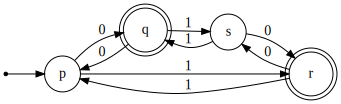

In [14]:
## Do not edit ##
dfa = DFA(states = {'p','q','r','s'},
		  initial_state='p',
		  final_states = {'q','r'},
		  input_symbols={'1','0'}, # Note: the input symbols must be strings not integers
		  transitions = {
			  'p': {'0': 'q', '1': 'r'},
			  'q': {'0': 'p', '1': 's'},
			  'r': {'0': 's', '1': 'p'},
              's': {'0': 'r', '1': 'q'}
		  }
		  )

dfa.show_diagram()

#### Part 2.1
Write down the sequence of states that are visisted during the computations of this automaton, on the following input words:
- `11101`
- `10011`
- `01011`

In [26]:
## Edit ##
input_11101= ['p','r','p','r','s','q']		# complete the computation
input_10011 = ['p','r','s','r','p','r']		# complete the computation
input_01011 = ['p','q','s','r','p','r']	# complete the computation

In [27]:
## Do not edit ##
assert check_soln(input_11101,'b72b85d1a17eb6bb74ca3dd063e85570'),  "Your sequence of states for input_11101 was not correct"
assert check_soln(input_10011,'0fbcbec2b2039bdfe8d6c95b77b69b2b'),  "Your sequence of states for input_10011 was not correct"
assert check_soln(input_01011,'49d3c6d47999509b36de033b8290dc1d'),  "Your sequence of states for input_01011 was not correct"

### Part 2.2
Describe the language that is decided by this DFA.

In [28]:
## Nothing to code for this part but feel free to write your answers here for reference
'''


'''

'\n\n\n'

# Task 3
Let $\Sigma=\{0,1\}$ be a binary alphabet. For each of the following languages $L$, construct a DFA that decides $L$:

### Part 3.1
$$L = \{w: \in \Sigma^\ast : w \text{ contains an even number of 0s or exactly two 1s}\}$$

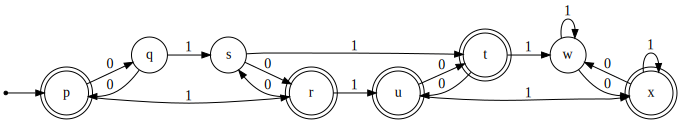

In [36]:
## Edit ##
dfa1 = DFA(
	states = {'p','q','r','s','t','u','w','x'},
	initial_state = 'p',
	final_states={'x','p','r','t','u'},
	input_symbols={'1','0'},
	transitions = {
			 'p': {'0': 'q', '1': 'r'},
			  'q': {'0': 'p', '1': 's'},
			  'r': {'0': 's', '1': 'u'},
        's': {'0': 'r', '1': 't'},
				't': {'0': 'u', '1': 'w'},
				'u': {'0': 't', '1': 'x'},
				'w': {'0': 'x', '1': 'w'},
	     	'x': {'0': 'w', '1': 'x'}
	}

)

dfa1.show_diagram()

In [37]:
## Do not edit ##
accepted_words = ['','1','100100','00010','00011','0100011']
rejected_words = ['00000','001000','0010','10','0','000100']

assert isinstance(dfa1,DFA), "Your proposed automaton 'dfa1' is not of type DFA"
assert all(dfa1.accepts_input(w) for w in accepted_words), "Your proposed DFA fails to accept some of the accepted_words"
assert all(not dfa1.accepts_input(w) for w in rejected_words), "Your proposed DFA fails to reject some of the rejected words"

### Part 3.2
$$L = \{w \in \Sigma^\ast : \text{the penultimate (second to last) digit of } w \text{ is a 1}\}$$

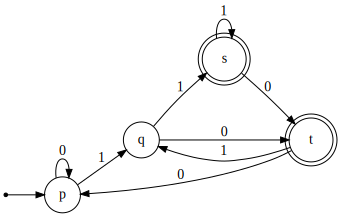

In [43]:
## Edit ##
dfa2 = DFA(
	states = {'p','q','s','t'},
	initial_state = 'p',
	final_states={'s','t'},
	input_symbols={'0','1'},
	transitions = {
			 'p': {'0': 'p', '1': 'q'},
			  'q': {'0': 't', '1': 's'},

        's': {'0': 't', '1': 's'},
				't': {'0': 'p', '1': 'q'}

	}

)

dfa2.show_diagram()

In [44]:
## Do not edit
accepted_words = ['11111','000010', '101010','1100110','010010','01110110']
rejected_words = ['10001', '110001','111001','1010100','10110000','1100000']

assert isinstance(dfa2,DFA), "Your proposed automaton 'dfa2' is not of type DFA"
assert all(dfa2.accepts_input(w) for w in accepted_words), "Your proposed DFA fails to accept some of the accepted_words"
assert all(not dfa2.accepts_input(w) for w in rejected_words), "Your proposed DFA fails to reject some of the rejected words"

#### Part 3.3
$$ L = \{w \in \Sigma^\ast : \text{ encodes a multiple of 5 in binary}\}.$$

<link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css">

<div class="alert alert-info" role="alert">
  <p><strong>Hint</strong> Consider how the addition of an extra 0 or 1 changes the remainder of the number modulo 5.</p>
</div>

In [ ]:
dfa3 = DFA(
	states = {'p','q','r','s','t',},
	initial_state = 'p',
	final_states={'p',},
	input_symbols={},
	transitions = {

	}

)

dfa3.show_diagram()

In [ ]:
## Tests for langauges of all binary strings that encode multiples of five
accepted_words = ['101101','110010', '10011011','1000001','111100','10100101']
rejected_words = ['100101', '110011','111001','1010110','10110010','1100000']

assert isinstance(dfa3,DFA), "Your proposed automaton 'dfa1' is not of type DFA"
assert all(dfa3.accepts_input(w) for w in accepted_words), "Your proposed DFA fails to accept some of the accepted_words"
assert all(not dfa3.accepts_input(w) for w in rejected_words), "Your proposed DFA fails to reject some of the rejected words"

# Task 4

#### Part 4.1
Complete the function `dfa_complement` which takes as input a DFA $A$ and returns a new DFA $B$ whose language is the complement of $A$'s language. i.e.
$$ \mathsf{Language}(B) = \Sigma^\ast - \mathsf{Language}(A)$$

In [ ]:
## Edit ##
def dfa_complement(A: DFA) -> DFA:
    B = DFA(
        states          = ,
        initial_state   = ,
        final_states    = ,
        input_symbols   = ,
        transitions     =
    )

    return B

In [45]:
## Do not edit ##
A = DFA(
        states          = {'p','q','r'},
        initial_state   = 'p',
        final_states    = {'p'},
        input_symbols   = {'0','1'},
        transitions     = {
            'p': {'0': 'p', '1': 'q'},
            'q': {'0': 'r', '1': 'p'},
            'r': {'0': 'q', '1': 'r'},
        }
    )

DFA_hash(dfa_complement(A).minify())
assert check_DFA_soln(dfa_complement(A), 'e96dc63288a373765c967b98fc3c0ac7'), "Your function does not appear to be correct"

NameError: name 'dfa_complement' is not defined

#### Part 4.2
(tricky) Complete the function `dfa_intersection` which takes as input two DFAs $A$ and $B$ and returns a new DFA $C$ whose language is the intersection of the languages of $A$ and $B$. i.e.
$$ \mathsf{Language}(C) = \mathsf{Language}(A) \cap \mathsf{Language}(B)$$

In [ ]:
## Edit ##
def dfa_intersection(A: DFA, B: DFA) -> DFA:
	assert A.input_symbols == B.input_symbols, "Input DFAs should have the same alphabet"
	input_symbols = A.input_symbols


	C = DFA(
		states			= ,
		initial_state	= ,
		final_states	= ,
		input_symbols	= input_symbols,
		transitions		=
	)

	return C

In [ ]:
## Do not edit ##
A = DFA(
        states          = {'p','q','r'},
        initial_state   = 'p',
        final_states    = {'p'},
        input_symbols   = {'0','1'},
        transitions     = {
            'p': {'0': 'p', '1': 'q'},
            'q': {'0': 'r', '1': 'p'},
            'r': {'0': 'q', '1': 'r'},
        }
    )

B = DFA(
        states          = {'x','y','z'},
        initial_state   = 'x',
        final_states    = {'z'},
        input_symbols   = {'0','1'},
        transitions     = {
            'x': {'0': 'x', '1': 'y'},
            'y': {'0': 'y', '1': 'z'},
            'z': {'0': 'z', '1': 'x'},
        }
    )


assert check_DFA_soln(dfa_intersection(A,B), '4edc16f6153041120aee3de102b7f446'), "Your function does not appear to be correct"

#### Part 4.3
Use yoru previously designed functions to complete the function `dfa_union` which takes as input two DFAs $A$ and $B$ and returns a new DFA $C$ whose language is the union of the languages of $A$ and $B$. i.e.
$$ \mathsf{Language}(C) = \mathsf{Language}(A) \cup \mathsf{Language}(B)$$

In [ ]:
## Edit ##
def dfa_union(A: DFA, B: DFA) -> DFA:

    return

In [ ]:
## Do not edit ##
A = DFA(
        states          = {'p','q','r'},
        initial_state   = 'p',
        final_states    = {'p'},
        input_symbols   = {'0','1'},
        transitions     = {
            'p': {'0': 'p', '1': 'q'},
            'q': {'0': 'r', '1': 'p'},
            'r': {'0': 'q', '1': 'r'},
        }
    )

B = DFA(
        states          = {'x','y','z'},
        initial_state   = 'x',
        final_states    = {'z'},
        input_symbols   = {'0','1'},
        transitions     = {
            'x': {'0': 'x', '1': 'y'},
            'y': {'0': 'y', '1': 'z'},
            'z': {'0': 'z', '1': 'x'},
        }
    )


assert check_DFA_soln(dfa_union(A,B), 'b7852282cdbe68d925665ab9f3cf588b'), "Your function does not appear to be correct"

<link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css">


<div class="alert alert-success" role="alert">
  <h5 class="alert-heading">Congratulations!</h5>
  <p>Well done on making it to the end of the notebook!</p>
</div>
